In [5]:
import keras
(train_input, train_target), (test_input, test_target) =\
keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [39]:
print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

(60000, 28, 28) (48000,)
(10000, 28, 28) (10000,)


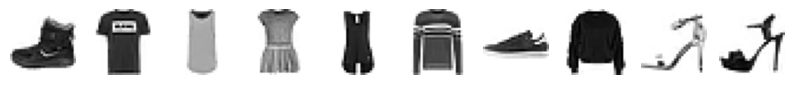

In [10]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 10, figsize = (10, 10))
for i in range(10):
    axs[i].imshow(train_input[i], cmap='gray_r')
    axs[i].axis('off')
plt.show()

In [11]:
print(train_target[:10])

[9 0 0 3 0 2 7 2 5 5]


In [12]:
import numpy as np
print(np.unique(train_target, return_counts = True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


In [13]:
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28 * 28)

In [14]:
print(train_scaled.shape)

(60000, 784)


In [18]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss = 'log_loss', max_iter =5, random_state = 42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs = -1)
print(np.mean(scores['test_score']))

/opt/miniconda3/envs/tensorflow_env/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/miniconda3/envs/tensorflow_env/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/miniconda3/envs/tensorflow_env/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/tensorflow_env/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/tensorflow_env/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/mi

0.8191833333333334


/opt/miniconda3/envs/tensorflow_env/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/miniconda3/envs/tensorflow_env/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/miniconda3/envs/tensorflow_env/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/tensorflow_env/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/tensorflow_env/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/mi

In [27]:
import keras
import tensorflow as tf
keras.config.backend()

'tensorflow'

In [21]:
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state = 42)

In [24]:
print(train_scaled.shape, train_target.shape)
print(val_scaled.shape, val_target.shape)

(48000, 784) (48000,)
(12000, 784) (12000,)


In [28]:
inputs = keras.layers.Input(shape = (784,))

In [31]:
dense = keras.layers.Dense(10, activation = 'softmax')

In [33]:
model = keras.Sequential([inputs, dense])

In [36]:
model.compile(loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [37]:
model.fit(train_scaled, train_target, epochs = 5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 456us/step - accuracy: 0.7286 - loss: 0.7904
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 454us/step - accuracy: 0.8394 - loss: 0.4750
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 482us/step - accuracy: 0.8456 - loss: 0.4540
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 465us/step - accuracy: 0.8515 - loss: 0.4371
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 609us/step - accuracy: 0.8554 - loss: 0.4231


In [38]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 528us/step - accuracy: 0.8513 - loss: 0.4328


[0.43924543261528015, 0.8512499928474426]